## Notebook to calculate the spectrum of $\Phi$ values for Oizumi et al. 2014 (OR+AND+XOR)

In [1]:
import pyphi
import numpy as np
from pyphi import phi_spectrum
from pyphi import utils
# from pyphi.phi_spectrum import get_all_CES

# Transition probability matrix. Saying where each state goes (little-end notation)
tpm = np.array([
    [0.,0.,0.],
    [0.,0.,1.],
    [1.,0.,1.],
    [1.,0.,0.],
    [1.,0.,0.],
    [1.,1.,1.],
    [1.,0.,1.],
    [1.,1.,0.]
])

# Set up network object
network = pyphi.Network(tpm, node_labels=['A','B','C'])
print("Network = ",network.node_labels)

# Put the system into a given state
state = (1,0,0)
nodes = ['A','B','C']

## Get the requisite Subsystem
subsystem = pyphi.Subsystem(network, state, nodes)

## Calculate all Phi values
display_CES= False  # if True, output will display constellations
Phi_Spectrum = phi_spectrum.get_phi_spectrum(subsystem,display_CES)

print("\nCuts = ",Phi_Spectrum[0])
print("\nPhi Spectrum = ",Phi_Spectrum[1])

Network =  NodeLabels(('A', 'B', 'C'))
	Number of Non-unique Constellations = 27

Evaluating Cut  Cut [A] ━━/ /━━➤ [B, C]
	Number of Non-unique Constellations = 1

Evaluating Cut  Cut [B] ━━/ /━━➤ [A, C]
	Number of Non-unique Constellations = 1

Evaluating Cut  Cut [A, B] ━━/ /━━➤ [C]
	Number of Non-unique Constellations = 9

Evaluating Cut  Cut [C] ━━/ /━━➤ [A, B]
	Number of Non-unique Constellations = 1

Evaluating Cut  Cut [A, C] ━━/ /━━➤ [B]
	Number of Non-unique Constellations = 1

Evaluating Cut  Cut [B, C] ━━/ /━━➤ [A]
	Number of Non-unique Constellations = 1

Cuts =  [Cut [A] ━━/ /━━➤ [B, C], Cut [B] ━━/ /━━➤ [A, C], Cut [A, B] ━━/ /━━➤ [C], Cut [C] ━━/ /━━➤ [A, B], Cut [A, C] ━━/ /━━➤ [B], Cut [B, C] ━━/ /━━➤ [A]]

Phi Spectrum =  [[1.965274, 2.027774, 1.92361, 1.98611, 1.951385, 2.013885, 1.993052, 2.055552, 1.951387, 2.013887, 1.979163, 2.041663], [1.979164, 2.041664, 2.006941, 2.069441, 1.92361, 1.98611, 1.951387, 2.013887, 1.951386, 2.013886], [1.854165, 1.895831, 1.868053

In [2]:
Phi_MIP = phi_spectrum.get_Phi_MIP(Phi_Spectrum)
print("Phi MIP = ",Phi_MIP)
print(len(Phi_MIP))
np.savetxt("results/phi_spectrum_oizumi_2014.csv", Phi_MIP, delimiter=",")
print("Results Saved")

Phi MIP =  [1.805554 1.833332 1.854165 1.861109 1.868052 1.868053 1.881942 1.881943
 1.89583  1.895831 1.909719 1.90972  1.916665 1.923607]
14
Results Saved


In [3]:
from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm

## Choose a font that renders the cut symbol properly
def char_in_font(Unicode_char, font):
    for cmap in font['cmap'].tables:
        if cmap.isUnicode():
            if ord(Unicode_char) in cmap.cmap:
                return True
    return False


uni_char = "\u27A4"

font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]
for i, font in enumerate(font_info):
    if char_in_font(uni_char, TTFont(font[0], fontNumber=0)):
        print(font[0], font[1])

/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf DejaVu Sans Mono
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf DejaVu Sans
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf DejaVu Sans Mono
/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf DejaVu Sans
/Library/Fonts/AppleGothic.ttf AppleGothic
/System/Library/Fonts/LastResort.ttf .LastResort
/System/Library/Fonts/ZapfDingbats.ttf Zapf Dingbats
/Library/Fonts/AppleMyungjo.ttf AppleMyungjo
/Library/Fonts/Arial Unicode.ttf Arial Unicode MS


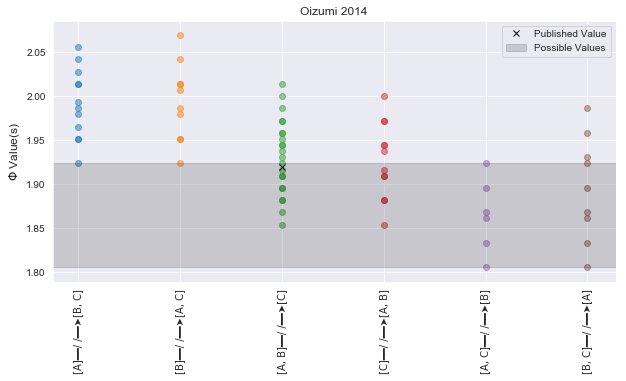

In [4]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import seaborn as sns
from pyphi import models
sns.set_style('darkgrid')
%matplotlib inline

## UTF Characters
LINE = "\u2501"
CUT_SYMBOL = LINE * 2 + "/ /" + LINE * 2 + "\u27A4"

## Set Font
# font_path = '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font_path = '/Users/jakehanson/.brew/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
font = mfm.FontProperties(fname=font_path) # find this font

## Initialize fig, ax objects
fig = plt.figure(figsize=(8.8,5.4))
ax = plt.subplot(111)

## Plot published value and possible values
plt.plot([2],[1.92],'kx',label=r'Published Value')
ax.axhspan(np.min(Phi_MIP), np.max(Phi_MIP), alpha=0.15,color='black',label='Possible Values')

## Scatterplot Phi Values for each cut
x_labels = []
for i in range(len(Phi_Spectrum[0])):
    cut = Phi_Spectrum[0][i]
    
    ## Get label for cut
    from_nodes = models.fmt.fmt_mechanism(cut.from_nodes, cut.node_labels)
    to_nodes = models.fmt.fmt_mechanism(cut.to_nodes, cut.node_labels)
    cut_label = from_nodes+CUT_SYMBOL+to_nodes
    
    ## Plot
    plt.scatter([i]*len(Phi_Spectrum[1][i]),Phi_Spectrum[1][i],alpha=0.5)
    x_labels.append(cut_label)
    
## Clean Up
plt.title('Oizumi 2014')
plt.ylabel(r'$\Phi$ Value(s)',fontsize=12)
plt.xticks(range(len(Phi_Spectrum[0])),x_labels,rotation=90,fontproperties=font)
# plt.ylim((0.0,1.0))
plt.legend()
# plt.legend(ncol=1,bbox_to_anchor = [1.25,1.0],prop=font,fontsize=12)
plt.tight_layout()
# plt.savefig("Oizumi_2014.pdf")
plt.show()